In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
os.getcwd()


'C:\\Users\\bilal'

In [3]:
os.chdir('C:\\Users\\bilal\\Desktop\\ML')

In [4]:
os.getcwd()

'C:\\Users\\bilal\\Desktop\\ML'

In [7]:
mall_data= pd.read_csv("Mall_Customers.csv")
mall_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
mall_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
mall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


array([[<AxesSubplot:title={'center':'CustomerID'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Annual Income (k$)'}>,
        <AxesSubplot:title={'center':'Spending Score (1-100)'}>]],
      dtype=object)

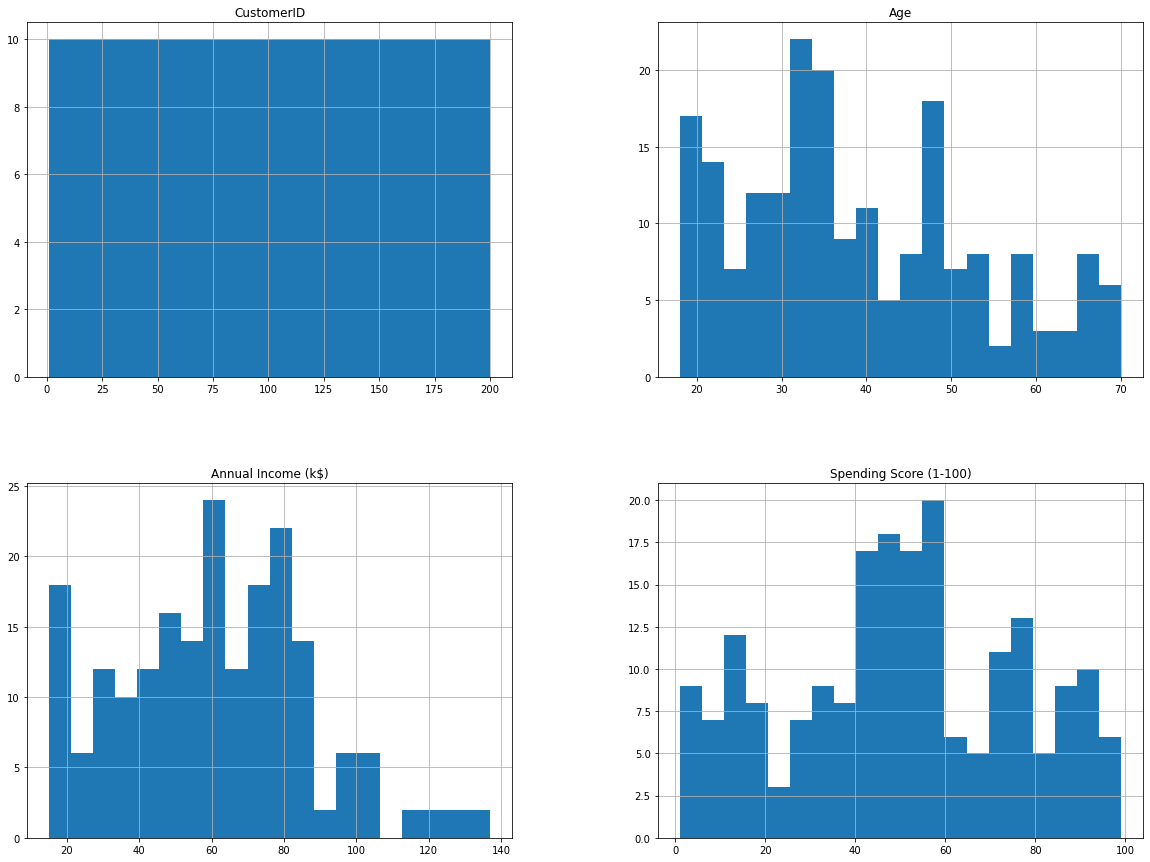

In [18]:
# on va plot un hist pour les attributs num pour voir

mall_data.hist(bins=20, figsize=(20,15))



In [20]:
mall_data.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [21]:
mall_data.Age.value_counts()

32    11
35     9
19     8
31     8
30     7
49     7
27     6
47     6
40     6
23     6
36     6
38     6
50     5
48     5
29     5
21     5
20     5
34     5
18     4
28     4
59     4
24     4
67     4
54     4
39     3
25     3
33     3
22     3
37     3
43     3
68     3
45     3
46     3
60     3
41     2
57     2
66     2
65     2
63     2
58     2
26     2
70     2
42     2
53     2
52     2
51     2
44     2
55     1
64     1
69     1
56     1
Name: Age, dtype: int64

In [23]:
mall_data["Annual Income (k$)"].value_counts()

54     12
78     12
60      6
87      6
62      6
       ..
61      2
126     2
59      2
58      2
15      2
Name: Annual Income (k$), Length: 64, dtype: int64

In [27]:
#on supp le customerID car il est inutile
mall_data.drop(["CustomerID"],axis=1)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


C:\Users\bilal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bilal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bilal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

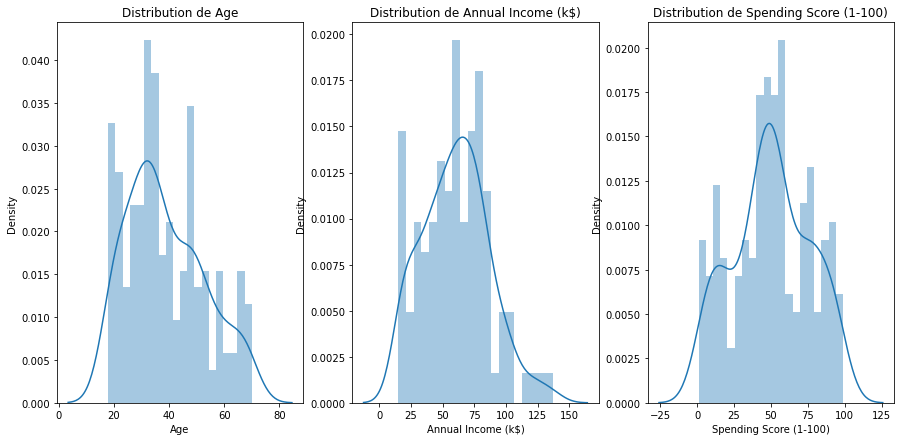

In [50]:
# on plot la distribution de chaque variable
plt.figure(1, figsize=(15,7))
n=0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    sns.distplot(mall_data[x],bins=20)
    plt.title("Distribution de {}".format(x))
plt.show()

# interessant car on peut voir que l'age moyen est d'environ 35-40 ans, bcp on 50k annuel et le scoreest de 50 en moyenne avec bcp de 75 
# et de 20

C:\Users\bilal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

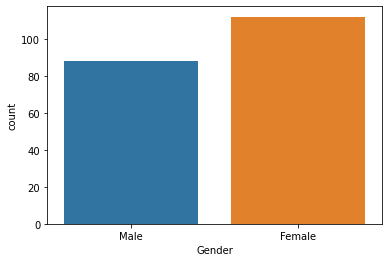

In [51]:
# countplot pour comparer homme/femme

sns.countplot(mall_data["Gender"])

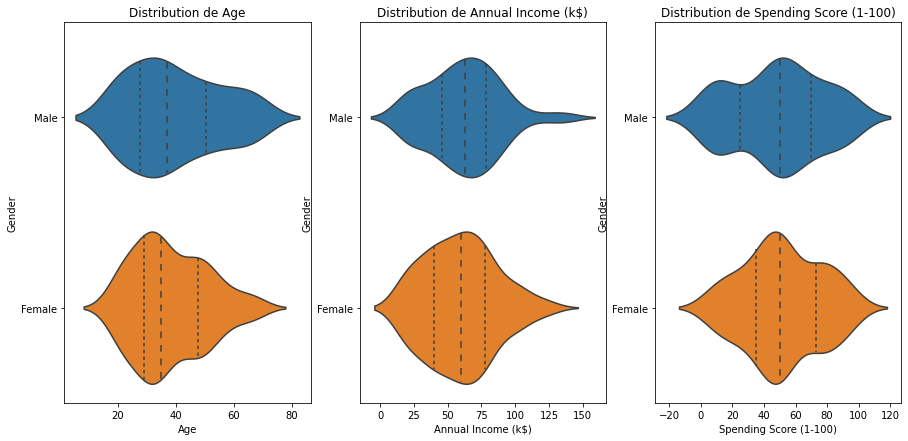

In [54]:
plt.figure(1, figsize=(15,7))
n=0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    sns.violinplot(x = mall_data[x],y=mall_data["Gender"], scale="count", inner="quartile")
    plt.title("Distribution de {}".format(x))
plt.show()
# en moyenne on voit que les hommes sont un peu plus riche que les femmes, plus vieux mais ont des scores egaux environ 
# on voit une très grosse densité de femme à 30 ans environ
# idem grosse densité a environ 60-65k annuel chez les femmes plus important que chez les hommes (elles sont plus nombreuses)

In [57]:
# on peut split l'age des client pour voir quelle tranche à le plus de client

age_18_25 = mall_data.Age[(mall_data.Age >= 18) & (mall_data.Age <= 25)]
age_26_35 = mall_data.Age[(mall_data.Age >= 26) & (mall_data.Age <= 35)]
age_36_45 = mall_data.Age[(mall_data.Age >= 36) & (mall_data.Age <= 45)]
age_46_55 = mall_data.Age[(mall_data.Age >= 46) & (mall_data.Age <= 55)]
age_56 = mall_data.Age[(mall_data.Age >= 56)]

C:\Users\bilal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Age')

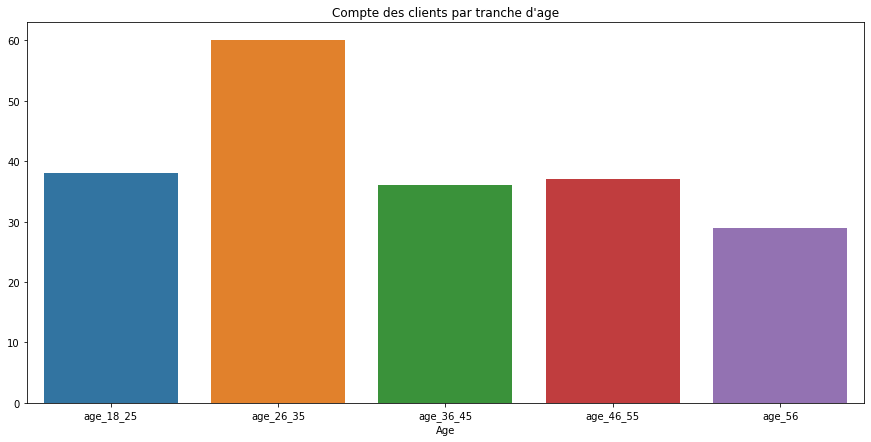

In [76]:
plt.figure(1, figsize=(15,7))

x = ['age_18_25','age_26_35','age_36_45','age_46_55','age_56']
y = [len(age_18_25),len(age_26_35),len(age_36_45),len(age_46_55),len(age_56)]
sns.barplot(x,y)
plt.title("Compte des clients par tranche d'age")
plt.xlabel("Age")

# la majeur partie des gens ont entre 26 et 35 ans. On pourrait les cibler eux en preiorité par exemple

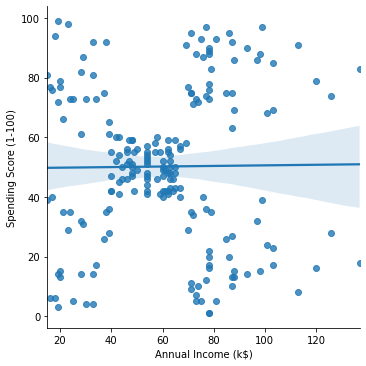

In [77]:
# on va essayer de trouver le corrélation entre income et le score

g = sns.lmplot(x= , y='Spending Score (1-100)', data=mall_data)

# ce quon peut voir cest que le score es ttjr entre 40-60 si le salaire est entre 40-60k

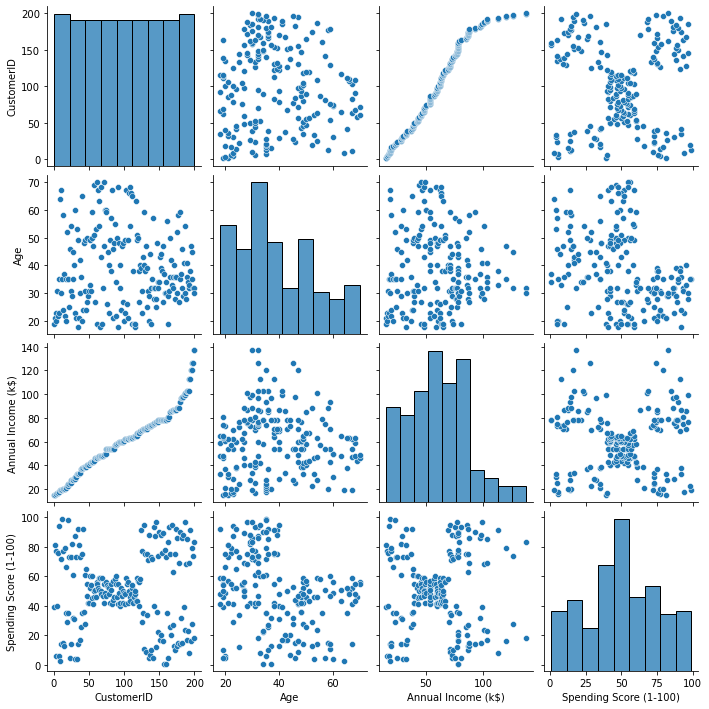

In [78]:
sns.pairplot(mall_data)


In [80]:
# on va faire des cat de score


ss_1_20 = mall_data["Spending Score (1-100)"][(mall_data['Spending Score (1-100)'] >= 1) & (mall_data["Spending Score (1-100)"] <= 20)]
ss_21_40 = mall_data["Spending Score (1-100)"][(mall_data['Spending Score (1-100)'] >= 21) & (mall_data["Spending Score (1-100)"] <= 40)]
ss_41_60 = mall_data["Spending Score (1-100)"][(mall_data['Spending Score (1-100)'] >= 41) & (mall_data["Spending Score (1-100)"] <= 60)]
ss_61_80 = mall_data["Spending Score (1-100)"][(mall_data['Spending Score (1-100)'] >= 61) & (mall_data["Spending Score (1-100)"] <= 80)]
ss_81_100 = mall_data["Spending Score (1-100)"][(mall_data['Spending Score (1-100)'] >= 81)]


C:\Users\bilal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Score')

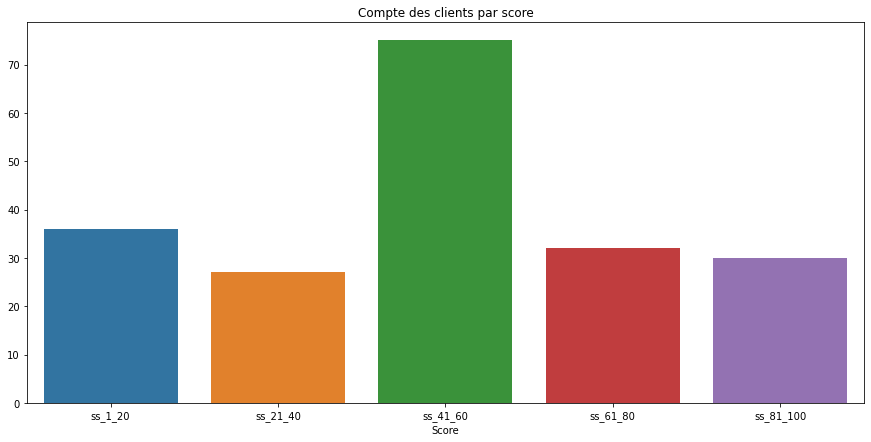

In [88]:
ssx = ['ss_1_20','ss_21_40','ss_41_60','ss_61_80','ss_81_100']
ssy = [len(ss_1_20),len(ss_21_40),len(ss_41_60),len(ss_61_80),len(ss_81_100)]
plt.figure(1,figsize=(15,7))
sns.barplot(ssx,ssy)
plt.title("Compte des clients par score")
plt.xlabel("Score")


In [94]:
in_1_30 = mall_data["Annual Income (k$)"][(mall_data["Annual Income (k$)"] >= 0) & (mall_data["Annual Income (k$)"] <= 30)]
in_31_60 = mall_data['Annual Income (k$)'][(mall_data["Annual Income (k$)"] >= 31) & (mall_data["Annual Income (k$)"] <= 60)]
in_61_90 = mall_data['Annual Income (k$)'][(mall_data["Annual Income (k$)"] >= 61) & (mall_data["Annual Income (k$)"] <= 90)]
in_91_120 = mall_data['Annual Income (k$)'][(mall_data["Annual Income (k$)"] >= 91) & (mall_data["Annual Income (k$)"] <= 120)]
in_121 = mall_data['Annual Income (k$)'][(mall_data["Annual Income (k$)"] >= 121)]


In [95]:
inx = ['in_1_30','in_31_60','in_61_90','in_91_120','in_121']
iny = [len(in_1_30),len(in_31_60),len(in_61_90),len(in_91_120),len(in_121)]

C:\Users\bilal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Salaire')

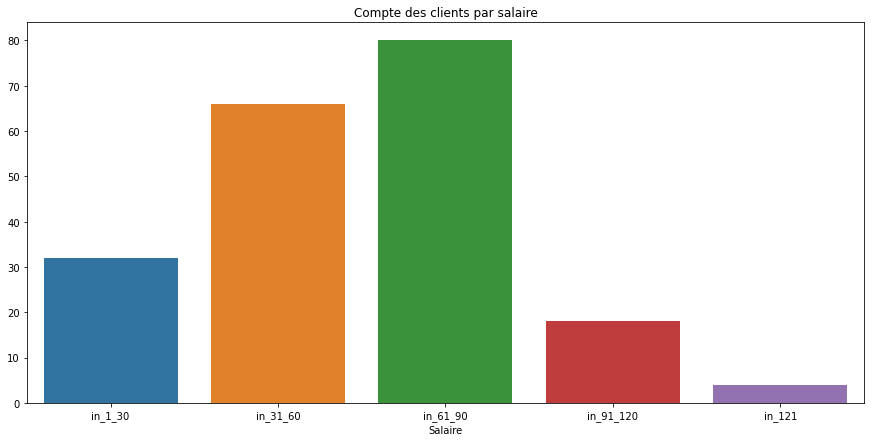

In [96]:
plt.figure(1,figsize=(15,7))
sns.barplot(inx,iny)
plt.title("Compte des clients par salaire")
plt.xlabel("Salaire")

In [200]:
# mtn qu'on a fini nos analises, on va regarder le nb de cluster qu'ils nous faut 
# on va dabord faire un kmeans entre l'age et le score

X = mall_data.loc[:,["Age","Spending Score (1-100)"]].values
X


array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

In [201]:
>>> from sklearn.cluster import KMeans
kmeans_par_k = [KMeans(n_clusters=k,random_state=42).fit(X) for k in range(2,11)]
inertia = [model.inertia_ for model in kmeans_par_k]

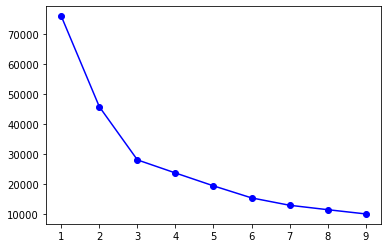

In [203]:
plt.plot(range(1,10),inertia,"bo-")

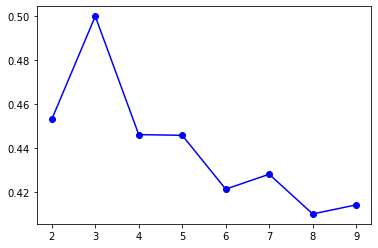

In [179]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_par_k[1:]]
plt.plot(range(2, 10), silhouette_scores, "bo-")

In [212]:
#donc on voit bien que 3 cluster sont suffisants

km = KMeans(n_clusters=4,random_state=0)
y_pred = km.fit_predict(X)
y_pred

array([0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 0, 2, 1, 0, 1,
       2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 3, 0,
       2, 0, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0,
       0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3,
       3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 1, 0, 1, 3, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [213]:
km.cluster_centers_

array([[27.61702128, 49.14893617],
       [30.1754386 , 82.35087719],
       [43.29166667, 15.02083333],
       [55.70833333, 48.22916667]])

Text(0.5, 1.0, "Cluster de du score en fonction de l'age des clients")

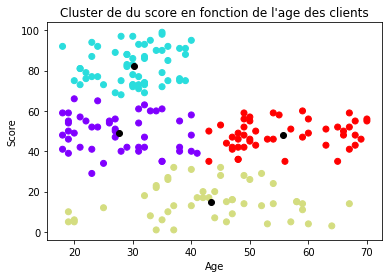

In [222]:
plt.scatter(X[:,0],X[:,1],c=km.labels_, cmap="rainbow")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c="black")
plt.xlabel("Age")
plt.ylabel("Score")
plt.title("Cluster de du score en fonction de l'age des clients")

In [223]:
# on va creer cluster du score en fct du salaire

X2 = mall_data.loc[:,['Annual Income (k$)',"Spending Score (1-100)"]].values
X2

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [253]:
kmeans_par_k = [KMeans(n_clusters=k,random_state=42).fit(X2) for k in range(2,11)]
inertia = [model.inertia_ for model in kmeans_par_k]

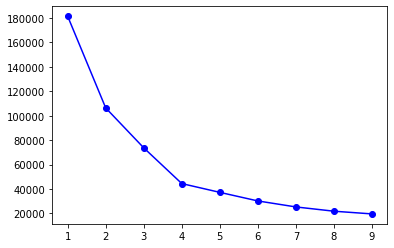

In [254]:
plt.plot(range(1,10),inertia,"bo-")

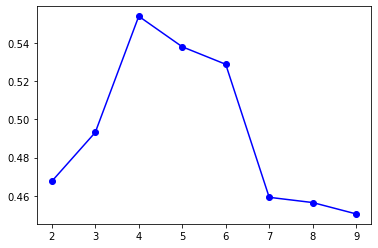

In [255]:
silhouette_scores = [silhouette_score(X2, model.labels_)
                     for model in kmeans_par_k[1:]]
plt.plot(range(2, 10), silhouette_scores, "bo-")

In [252]:
#donc on voit bien que 4 ou 5 cluster sont suffisants car on retrouve le max de score

km2 = KMeans(n_clusters=5,random_state=0)
y_pred = km2.fit_predict(X2)
y_pred

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [236]:
km2.cluster_centers_

array([[55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

Text(0.5, 1.0, 'Cluster de du score en fonction du salaire des clients')

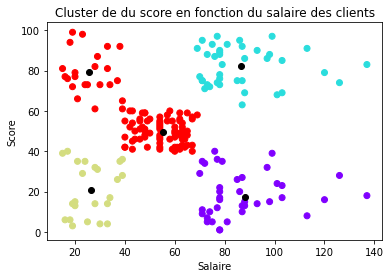

In [239]:
plt.scatter(X2[:,0],X2[:,1],c=km.labels_, cmap="rainbow")
plt.scatter(km2.cluster_centers_[:,0],km2.cluster_centers_[:,1], c="black")
plt.xlabel("Salaire")
plt.ylabel("Score")
plt.title("Cluster de du score en fonction du salaire des clients")

In [241]:
# la on a fait que par 2, cette fois on va consider le score le salaire et l'age ensemble

X3 = mall_data.loc[:,["Age",'Annual Income (k$)',"Spending Score (1-100)"]].values
X3

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

In [242]:
kmeans_par_k = [KMeans(n_clusters=k,random_state=42).fit(X3) for k in range(2,11)]
inertia = [model.inertia_ for model in kmeans_par_k]

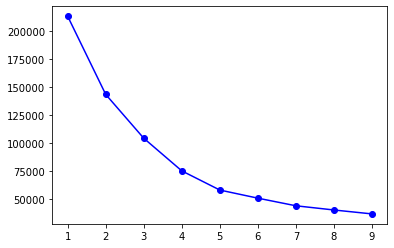

In [243]:
plt.plot(range(1,10),inertia,"bo-")

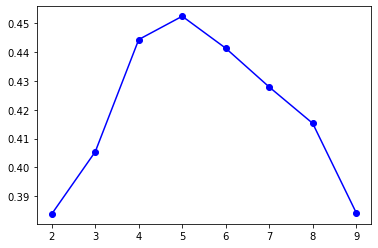

In [244]:
silhouette_scores = [silhouette_score(X3, model.labels_)
                     for model in kmeans_par_k[1:]]
plt.plot(range(2, 10), silhouette_scores, "bo-")

In [272]:
# 4 5 ou 6 clusters sont acceptables ici 


km3 = KMeans(n_clusters=5,random_state=0)
y_pred = km3.fit_predict(X3)


In [273]:
km3.cluster_centers_

array([[45.2173913 , 26.30434783, 20.91304348],
       [43.08860759, 55.29113924, 49.56962025],
       [32.69230769, 86.53846154, 82.12820513],
       [40.66666667, 87.75      , 17.58333333],
       [25.52173913, 26.30434783, 78.56521739]])

In [324]:
mall_data['label'] = y_pred
mall_data
plt=reload(plt)
%matplotlib
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mall_data.Age[mall_data.label ==0],mall_data["Annual Income (k$)"][mall_data.label == 0],mall_data["Spending Score (1-100)"][mall_data.label ==0], c="blue", s=60)
ax.scatter(mall_data.Age[mall_data.label ==1],mall_data["Annual Income (k$)"][mall_data.label == 1],mall_data["Spending Score (1-100)"][mall_data.label ==1], c="red", s=60)
ax.scatter(mall_data.Age[mall_data.label ==2],mall_data["Annual Income (k$)"][mall_data.label == 2],mall_data["Spending Score (1-100)"][mall_data.label ==2], c="yellow", s=60)
ax.scatter(mall_data.Age[mall_data.label ==3],mall_data["Annual Income (k$)"][mall_data.label == 3],mall_data["Spending Score (1-100)"][mall_data.label ==3], c="green", s=60)
ax.scatter(mall_data.Age[mall_data.label ==4],mall_data["Annual Income (k$)"][mall_data.label == 4],mall_data["Spending Score (1-100)"][mall_data.label ==4], c="purple", s=60)

plt.xlabel("Age")
plt.ylabel("Income")
ax.set_zlabel("Score")
plt.show()

Using matplotlib backend: Qt5Agg
